In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


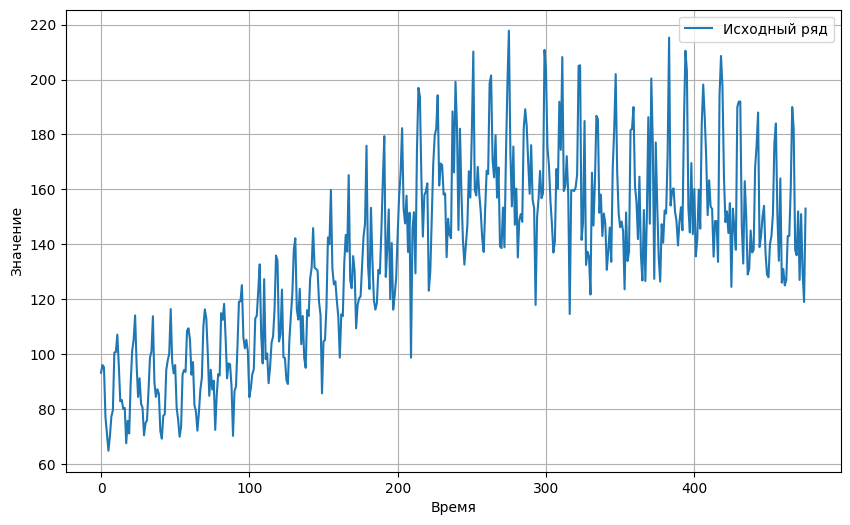

In [27]:
import pandas as pd


def plot_series(t, series, label=None, style='-'):
    plt.plot(t, series, style, label=label)
    plt.xlabel('Время')
    plt.ylabel('Значение')
    plt.grid(True)


df = pd.read_csv('data.csv')


plt.figure(figsize=(10, 6))
plot_series(np.arange(len(df)), df.beer, label='Исходный ряд')
plt.legend()
plt.show()


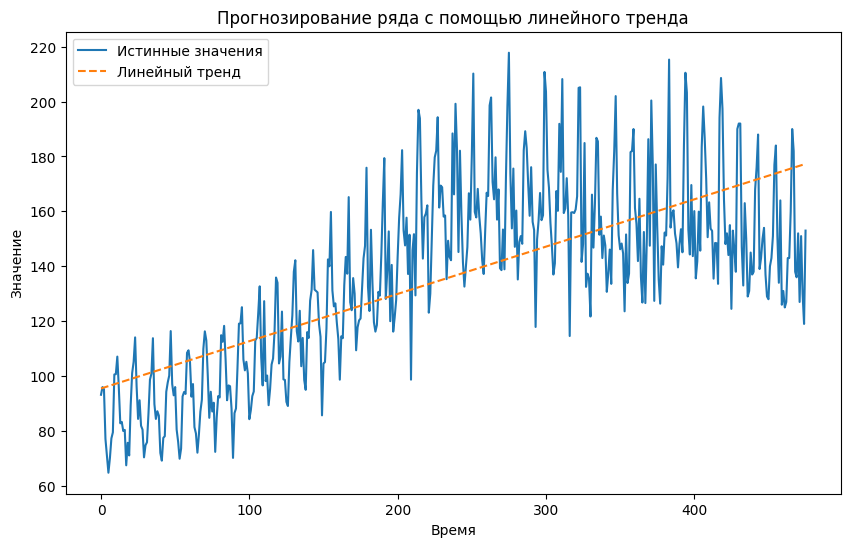

In [6]:
# Простая линейная модель для прогнозирования
t = np.arange(len(df))
model = LinearRegression()
model.fit(t.reshape(-1, 1), df.beer)
predictions = model.predict(t.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(t, df.beer, label='Истинные значения')
plt.plot(t, predictions, label='Линейный тренд', linestyle='--')
plt.title('Прогнозирование ряда с помощью линейного тренда')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

In [95]:
y.shape

(466,)

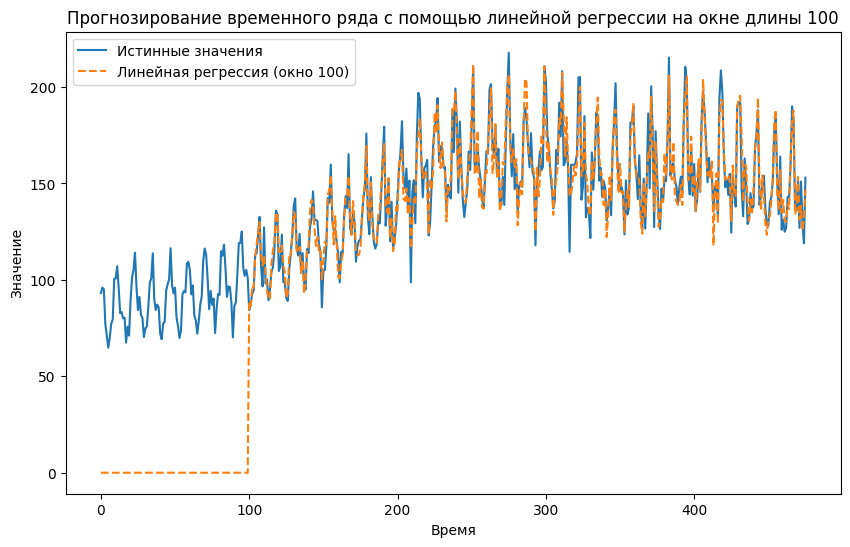

Среднеквадратичная ошибка: 66.4288359517268


In [97]:
window_size = 100
X = []
y = []

series = df.beer.values
for i in range(len(series) - window_size):
    X.append(series[i:i+window_size])
    y.append(series[i+window_size])

X = np.array(X)
y = np.array(y)

model_window = LinearRegression()
model_window.fit(X, y)

# Прогнозирование
predictions_window = []
for i in range(len(series) - window_size):
    prediction = model_window.predict([series[i:i+window_size]])[0]
    predictions_window.append(prediction)

# Дополняем начало графика нулями для корректного отображения
predictions_window = [0]*window_size + predictions_window

plt.figure(figsize=(10, 6))
plt.plot(t, series, label='Истинные значения')
plt.plot(t, predictions_window, label=f'Линейная регрессия (окно {window_size})', linestyle='--')
plt.title(f'Прогнозирование временного ряда с помощью линейной регрессии на окне длины {window_size}')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

print(f"Среднеквадратичная ошибка: {mean_squared_error(series[window_size:], predictions_window[window_size:])}")


# фичи

это может быть 
например есть временной ряд и точка 3.07.2024 10:30

можем извлечь

* день недели - вторник (2)
* день месяца - (3)
* сезон - весна (2)
* месяц - июль (7)
* год - 2024
* час 10
* минуты 30
* выходной - false
* праздник - false

туда же всякие аггрегаты целевой функции по окну 1 шаг назад, 2 шага назад, window_size шагов назад
 * мин\макс
 * среднее\медиана
 * std
 * сглаженное значение

**сезонные фичи**

* значение вчера, 2 дня назад, три, window_size дней назад
* неделю, месяц, два месяца, полгода, год назад



**аггрегаты по признакам**

можем считать целевую переменную при разных условиях 

например

* продажи товара в июле прошлого года в выходные\будние
* продажи товара в дни, когда продавался похожий товар
* погода в ветренные дни\дни с осадками\облачные и тд   год назад 


In [100]:
df.tail()

,month,beer,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,mon,yr,year_ago,year_total,last_year_total
471,1995-04,127.0,152.0,136.0,138.0,182.0,190.0,160.0,143.0,143.0,127.0,4,1995,126.0,146.166667,147.000000
472,1995-05,151.0,127.0,152.0,136.0,138.0,182.0,190.0,160.0,143.0,143.0,5,1995,131.0,147.833333,146.500000
473,1995-06,130.0,151.0,127.0,152.0,136.0,138.0,182.0,190.0,160.0,143.0,6,1995,125.0,148.250000,146.166667
474,1995-07,119.0,130.0,151.0,127.0,152.0,136.0,138.0,182.0,190.0,160.0,7,1995,127.0,147.583333,146.083333
475,1995-08,153.0,119.0,130.0,151.0,127.0,152.0,136.0,138.0,182.0,190.0,8,1995,143.0,148.416667,146.333333


In [98]:
def generate_features(df):
    for shift in range(1, 10):
        df[f'shift_{shift}'] = df.beer.shift(shift).fillna(0)
    df["mon"] = df["month"].apply(lambda x: int(x.split("-")[1]))
    df["yr"] = df["month"].apply(lambda x: int(x.split("-")[0]))

    df["year_ago"] = df.beer.shift(12)
    df["year_total"] = df.rolling(window=12).beer.mean()
    df["last_year_total"] = df.rolling(window=12).beer.mean().shift(12)
    df.fillna(0, inplace=True)
    return df

df = generate_features(df)

# метрики

In [55]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error



# кросс валидация


In [119]:
from sklearn.model_selection import train_test_split

train ,test = train_test_split(df, shuffle=False, test_size=0.2)

In [106]:
train.head()

,month,beer,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,mon,yr,year_ago,year_total,last_year_total
0,1956-01,93.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1956,0.0,0.0,0.0
1,1956-02,96.0,93.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1956,0.0,0.0,0.0
2,1956-03,95.2,96.0,93.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1956,0.0,0.0,0.0
3,1956-04,77.1,95.2,96.0,93.2,0.0,0.0,0.0,0.0,0.0,0.0,4,1956,0.0,0.0,0.0
4,1956-05,70.9,77.1,95.2,96.0,93.2,0.0,0.0,0.0,0.0,0.0,5,1956,0.0,0.0,0.0



# как предсказывать?



1 способ - авторегрессионно

получаем окно - предсказываем значение

добавляем предсказание в окно

In [38]:
df.month

0      1956-01
1      1956-02
2      1956-03
3      1956-04
4      1956-05
        ...   
471    1995-04
472    1995-05
473    1995-06
474    1995-07
475    1995-08
Name: month, Length: 476, dtype: object

In [61]:
test.shape

(96, 16)

In [107]:
test.shape

(96, 16)

In [120]:
# авторегрессионное предсказание
X = train.drop(columns=["month", "beer"]).values
y = train.beer.values

model_ar = LinearRegression()
model_ar.fit(X[12:], y[12:])

next_val = model_ar.predict([X[-1]])
print(f"Предсказание на следующий месяц: {next_val[0]}")


Предсказание на следующий месяц: 144.6979384844364


In [121]:
train.tail()

,month,beer,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,mon,yr,year_ago,year_total,last_year_total
375,1987-04,154.4,177.1,127.4,177.2,200.4,147.5,186.3,150.1,126.6,152.5,4,1987,164.6,155.208333,155.666667
376,1987-05,135.2,154.4,177.1,127.4,177.2,200.4,147.5,186.3,150.1,126.6,5,1987,136.2,155.125000,154.958333
377,1987-06,126.4,135.2,154.4,177.1,127.4,177.2,200.4,147.5,186.3,150.1,6,1987,126.8,155.091667,155.225000
378,1987-07,147.3,126.4,135.2,154.4,177.1,127.4,177.2,200.4,147.5,186.3,7,1987,152.5,154.658333,155.300000
379,1987-08,140.6,147.3,126.4,135.2,154.4,177.1,127.4,177.2,200.4,147.5,8,1987,126.6,155.825000,154.691667


In [129]:
train.tail()

,month,beer,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,mon,yr,year_ago,year_total,last_year_total
376,1987-05,135.200000,154.4,177.1,127.4,177.2,200.4,147.5,186.3,150.1,126.6,5,1987,136.2,155.125000,154.958333
377,1987-06,126.400000,135.2,154.4,177.1,127.4,177.2,200.4,147.5,186.3,150.1,6,1987,126.8,155.091667,155.225000
378,1987-07,147.300000,126.4,135.2,154.4,177.1,127.4,177.2,200.4,147.5,186.3,7,1987,152.5,154.658333,155.300000
379,1987-08,140.600000,147.3,126.4,135.2,154.4,177.1,127.4,177.2,200.4,147.5,8,1987,126.6,155.825000,154.691667
379,1987-09,144.697938,140.6,147.3,126.4,135.2,154.4,177.1,127.4,177.2,200.4,9,1987,150.1,155.374828,155.750000


In [131]:
next_month = train.iloc[-1].copy()
next_month["month"] = "1987-09"
next_month["beer"] = next_val[-1]
train = pd.concat([train, pd.DataFrame([next_month])])

train = generate_features(train)
pred = model_ar.predict(train.drop(columns=["month", "beer"]).values[12:])[-1]
print(pred)

160.70487922516304


In [81]:
# генерим фичи для предсказания на следующий месяц
preds = []
for i in range(96):
    next_month = train.iloc[-1].copy()
    next_month["month"] = "1995-09"
    next_month["beer"] = next_val[-1]
    next_month = generate_features(pd.concat([train[-24:], pd.DataFrame([next_month])]))

    X_next = next_month.drop(columns=["month", "beer"])
    next_month.head()
    # break
    next_val = model_ar.predict([X_next.iloc[-1]])
    # print(next_val.shape)
    train = pd.concat([train, pd.DataFrame([next_month.iloc[-1]])])
    preds.append(next_val[-1])

print(preds)


Предсказание на следующий месяц: -15.755036050421836
[-15.919459176851149, -16.080992930140212, -16.24822205216867, -16.411435328566142, -16.57838954007036, -16.743554234665567, -16.91439285114683, -17.08726118928331, -17.26173231035534, -17.440084636079348, -17.61414843475245, -17.78966473522837, -17.970610468794177, -18.152873266950394, -18.33623720631391, -18.51973655810184, -18.704470657066622, -18.890389211856927, -19.08051678273972, -19.27121060060324, -19.464713795266732, -19.65877834271697, -19.853172624360184, -20.050658018595527, -20.251116756127658, -20.45308345579832, -20.656243646497046, -20.860871718668477, -21.066878314184123, -21.275682445025097, -21.486711990633296, -21.699331542767084, -21.913907321225395, -22.129595412470906, -22.34731903015603, -22.567739299148116, -22.79042454833791, -23.014693227636258, -23.24080797004524, -23.46869243551089, -23.698825838922062, -23.931516993403193, -24.16620838514001, -24.40290531080376, -24.641526559186048, -24.882121544912877,

2 способ - создадим window_size моделей

каждая будет получать фичи 

и i-ая модель будет предсказывать значение t + i, где t- конец наших данных



In [132]:
models = []

for shift in range(1, 12):
    X = df.drop(columns=["month", "beer"]).values
    y = df.beer.shift(shift).fillna(0).values
    model = LinearRegression()
    model.fit(X, y)
    models.append(model)

In [138]:
models[0].coef_

array([ 1.00000000e+00, -9.73954443e-16, -8.84195354e-16, -6.27114076e-16,
       -4.94954387e-16, -1.02249933e-15, -9.38011001e-16, -4.60844688e-16,
       -1.43061011e-15,  5.76786827e-16, -5.90815029e-16, -1.76347575e-15,
       -1.22017436e-15, -1.88365091e-15])

In [139]:
next_vals = []
for model in models:
    next_val = model.predict([X[-1]])
    next_vals.append(next_val[0])
print(next_vals)

[118.99999999999983, 129.99999999999972, 150.9999999999999, 127.00000000000001, 152.00000000000009, 136.0000000000001, 138.0000000000002, 182.00000000000017, 190.0000000000001, 168.7975087131997, 156.22165837598334]


In [141]:
len(next_vals)

11

In [146]:
mean_absolute_percentage_error(test.beer.values[:11], np.array(next_vals))

0.175763545396354

3 способ?? - можно ли их объединить?

гибридный - 12 моделей, где каждая использует предсказания предыдущей

оказывается, можно немного подумать и попробовать разложить ряд в несколько компонент, а именно -- ?

# STL декомпозиция

тренд, сезонность и шум

тогда наш ряд = тренд + сезонность + шум

**как это сделать?**

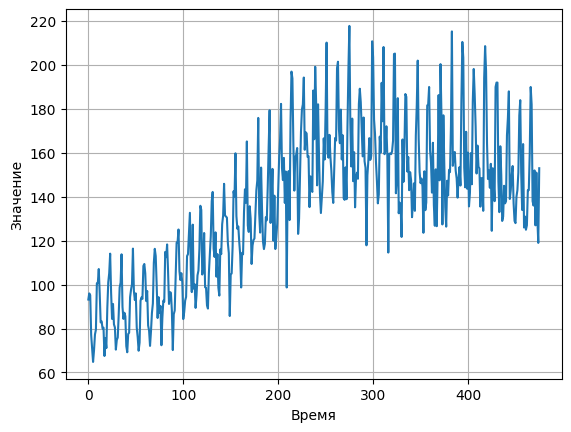

In [147]:
plot_series(np.arange(len(df.beer)), df.beer)

In [194]:
s = 12
trend = []

# for i in range(s//2 , len(df.beer)  - s//2):
#     trend.append(df.beer[i-s//2:i + s//2].mean())

# for i in range(0, len(df.beer)  - s):
#     trend.append(df.beer[i: i+s+1].mean())
trend = df.beer.rolling(window=12).mean()

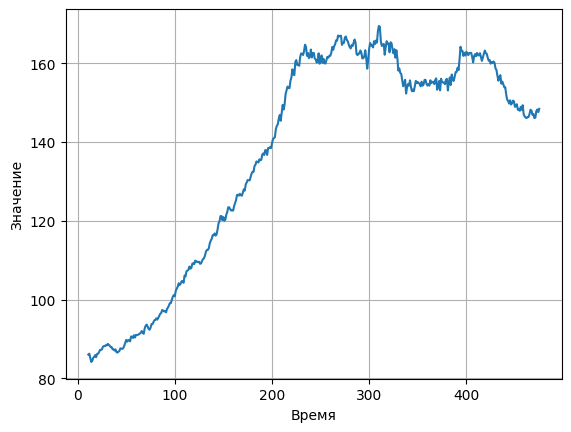

In [195]:

plot_series(np.arange(len(trend)), trend, label="Trend")

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
471   -19.166667
472     3.166667
473   -18.250000
474   -28.583333
475     4.583333
Name: beer, Length: 476, dtype: float64

In [224]:
df.beer.shape

(476,)

In [225]:
trend

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
471    146.166667
472    147.833333
473    148.250000
474    147.583333
475    148.416667
Name: beer, Length: 476, dtype: float64

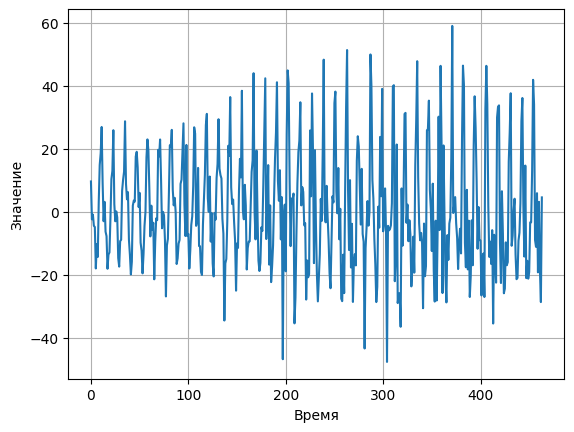

In [226]:
seasonality = df.beer[s:].values - np.array(trend)[s:]
plot_series(np.arange(len(seasonality)), seasonality, label="Seasonality")

In [227]:
groups = []
for i in range(len(seasonality) // s):
    groups.append(seasonality[i*s: (i+1)*s])


In [228]:
np.array(groups)

array([[ 9.63333333e+00, -2.36666667e+00, -8.75000000e-01,
        -4.41666667e+00, -4.80833333e+00, -1.79333333e+01,
        -1.02000000e+01, -1.42833333e+01,  3.10000000e+00,
         1.48583333e+01,  1.85833333e+01,  2.69000000e+01],
       [ 9.06666667e+00, -2.96666667e+00,  3.17500000e+00,
        -6.28333333e+00, -7.69166667e+00, -1.80333333e+01,
        -1.35583333e+01, -1.28583333e+01, -2.20833333e+00,
         1.03916667e+01,  1.29500000e+01,  2.58750000e+01],
       [ 2.41666667e+00, -2.98333333e+00,  1.50000000e-01,
        -1.75833333e+00, -1.46500000e+01, -1.73500000e+01,
        -9.27500000e+00, -8.85833333e+00,  6.67500000e+00,
         1.01583333e+01,  1.27166667e+01,  2.87000000e+01],
       [ 8.79166667e+00,  3.97500000e+00,  6.24166667e+00,
        -8.83333333e+00, -1.35750000e+01, -1.98333333e+01,
        -1.58083333e+01,  1.98333333e+00,  3.59166667e+00,
         3.24166667e+00,  1.75500000e+01,  1.90333333e+01],
       [ 1.40666667e+01,  1.50833333e+00,  6.0166666

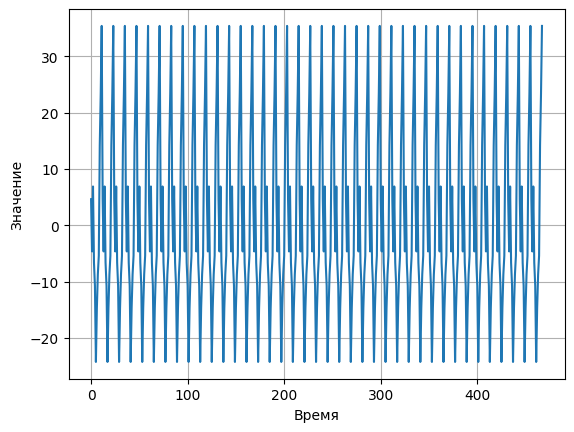

In [229]:
season = np.array(groups).mean(axis=0)

seasons = np.tile(season, len(df) // s)
plot_series(np.arange(len(seasons)), seasons, label="Season")

In [247]:
seasons.shape

(468,)

In [267]:
trend[:s].shape

(12,)

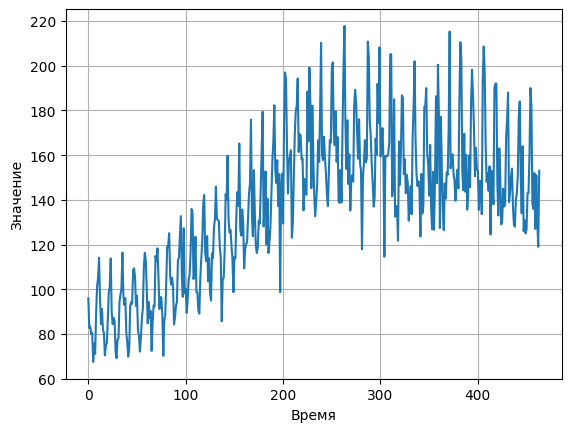

In [269]:
sset = trend[s:] + seasonality
plot_series(np.arange(len(sset)), sset, label="Trend + Seasonality")

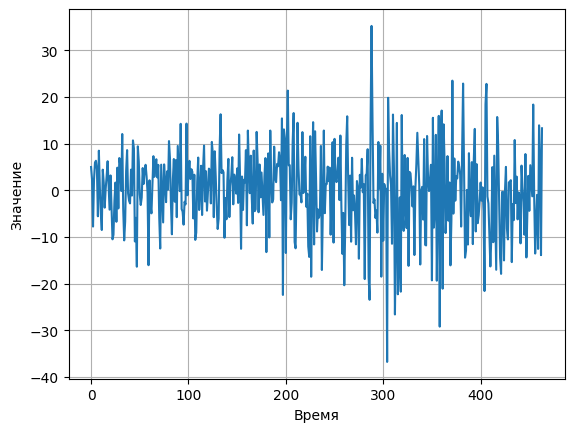

In [263]:
noise = seasonality - seasons[:-4]

plot_series(np.arange(len(noise)), noise, label="Noise")

# ускорение

все это конечно прикольно...

но вот примерно так выглядит типичный пайплайн фичегенерации ( на пандасе считается минут 15)

In [16]:
def get_features(base, ids, kind):
    cost_features = base.groupby('client_id')['amount_rur'].agg(['sum','mean','std','min','max'])

    cost_appearance_features = base.groupby('client_id')['amount_rur'].agg([lambda x: x[x < 10].count(),
                                                                            lambda x: x[x < 50].count(),
                                                                            lambda x: x[x < 100].count(),
                                                                            lambda x: x[x < 500].count(),
                                                                            lambda x: x[x > 500].count(),
                                                                            lambda x: x[x < 1000].count(),
                                                                            lambda x: x[x > 5000].count(),
                                                                            lambda x: x[x > 10000].count()])
    cost_appearance_features.columns = ['trans_less10', 'trans_less50', 'trans_less100', 'trans_less500', 'trans_greater500', 'trans_less1000', 'trans_greater5000', 'trans_greater10000']
    for i in cost_appearance_features.columns:
      cost_appearance_features['weighted_'+i] = cost_appearance_features[i] / base.groupby('client_id')['amount_rur'].count()
    
    base["trans_month"] = base["trans_date"].apply(lambda x: (x // 30) % 12)
    base["trans_week"] = base["trans_date"].apply(lambda x: (x // 7) % 52)
    base["trans_weekday"] = base["trans_date"].apply(lambda x: x % 7)

    counter_mean = base.groupby(['client_id','trans_date'])['amount_rur'].count()
    counter_mean = pd.DataFrame(counter_mean).groupby('client_id').mean()
    counter_mean.columns = ['mean_count_per_day']
    
    counter_date = base.groupby(['client_id',"trans_weekday"])['amount_rur'].count()
    counter_date = counter_date.reset_index().pivot(index='client_id', \
                                                      columns="trans_weekday",values='amount_rur')
    counter_date = counter_date.fillna(0)
    counter_date.columns = ['weekday_count_' + str(i) for i in range(7)] 
    # количество транзакций по дням
    
    amount_day = base.groupby(['client_id',"trans_weekday"]).sum()['amount_rur']
    amount_day = amount_day.reset_index().pivot(index='client_id', \
                                                      columns="trans_weekday",values='amount_rur')
    amount_day = amount_day.fillna(0)
    amount_day.columns = ['weekday_spend_' + str(i) for i in range(7)]
    # сумма транзакций по дням
    
    counter_month = base.groupby(['client_id','trans_month'])['amount_rur'].count()
    counter_month = counter_month.reset_index().pivot(index='client_id', \
                                                      columns='trans_month',values='amount_rur')
    counter_month = counter_month.fillna(0)
    counter_month.columns = ['month_count_' + str(i) for i in range(12)]
    # количество транзакций по месяцам
    
    amount_month = base.groupby(['client_id','trans_month']).sum()['amount_rur']
    amount_month = amount_month.reset_index().pivot(index='client_id', \
                                                      columns='trans_month',values='amount_rur')
    amount_month = amount_month.fillna(0)
    amount_month.columns = ['month_spend_' + str(i) for i in range(12)]
    # сумма транзакций по месяцам
        
    counter_week = base.groupby(['client_id','trans_week'])['amount_rur'].count()
    counter_week = counter_week.reset_index().pivot(index='client_id', \
                                                      columns='trans_week',values='amount_rur')
    counter_week = counter_week.fillna(0)
    counter_week.columns = ['week_count_' + str(i) for i in range(52)]
    # количество транзакций по неделям
    
    amount_week = base.groupby(['client_id','trans_week']).sum()['amount_rur']
    amount_week = amount_week.reset_index().pivot(index='client_id', \
                                                      columns='trans_week',values='amount_rur')
    amount_week = amount_week.fillna(0)
    amount_week.columns = ['week_spend_' + str(i) for i in range(52)]
    # сумма транзакций по неделям
    
    counter_cat = base.groupby(['client_id','small_group'])['amount_rur'].count()
    counter_cat = counter_cat.reset_index().pivot(index='client_id', \
                                                      columns='small_group',values='amount_rur')
    counter_cat = counter_cat.fillna(0)
    counter_cat.columns = ['cat_count_' + str(i) for i in counter_cat.columns]
    # количество транзакций по категориям
    
    
    amount_cat = base.groupby(['client_id','small_group']).mean()['amount_rur']
    amount_cat = amount_cat.reset_index().pivot(index='client_id', \
                                                      columns='small_group',values='amount_rur')
    amount_cat = amount_cat.fillna(0)
    amount_cat.columns = ['cat_spend_' + str(i) for i in amount_cat.columns]
    # сумма транзакций по категориям
    
    
    output = pd.merge(ids, cost_features.reset_index(), on='client_id')
    output = pd.merge(output, cost_appearance_features.reset_index(), on='client_id')
    output = pd.merge(output, counter_mean.reset_index(), on='client_id')
    output = pd.merge(output, counter_cat.reset_index(), on='client_id')
    output = pd.merge(output, amount_day.reset_index(), on='client_id')
    output = pd.merge(output, amount_cat.reset_index(), on='client_id')
    output = pd.merge(output, counter_date.reset_index(), on='client_id')
    output = pd.merge(output, counter_month.reset_index(), on='client_id')
    output = pd.merge(output, amount_month.reset_index(), on='client_id')
    output = pd.merge(output, counter_week.reset_index(), on='client_id')
    output = pd.merge(output, amount_week.reset_index(), on='client_id')
        
    for i in amount_cat.columns:
        output["weighted_" + i] = amount_cat[i] / output["sum"] 
    
    for i in amount_day.columns:
        output["weighted_" + i] = amount_day[i] / output["sum"] 
    for i in amount_month.columns:
        output["weighted_" + i] = amount_month[i] / output["sum"] 
    for i in amount_week.columns:
        output["weighted_" + i] = amount_week[i] / output["sum"] 
        
    for i in amount_cat.columns:
       for j in amount_cat.columns:
           if i!=j:
               output["ratio_" + i + "_and_" + j] = output["weighted_" + i] / output["weighted_" + j]
    base_20k = pd.read_csv(root + "data/6k" + kind + ".csv")
    cols = np.concatenate([[base_20k.columns[1]], base_20k.columns[7:]])
    output = pd.merge(output, base_20k[cols].reset_index(), on='client_id')
    output = output.drop("client_id", 1)
    output = output.fillna(0)
    return output

    

на выходе датафрейм с 10к столбцов... пам-пам...


а мы еще хотим быстро итерироваться и проверять гипотезы 

# Dask - for big bois, не влезающих в память


API такое же, только 


In [ ]:
import dask.dataframe as dd

df = dd.read_csv('data.csv')
df.head()

# Polars  - for fast smol bois

In [18]:
%pip install polars -q

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import polars as pl 
df = pl.read_csv('data.csv')

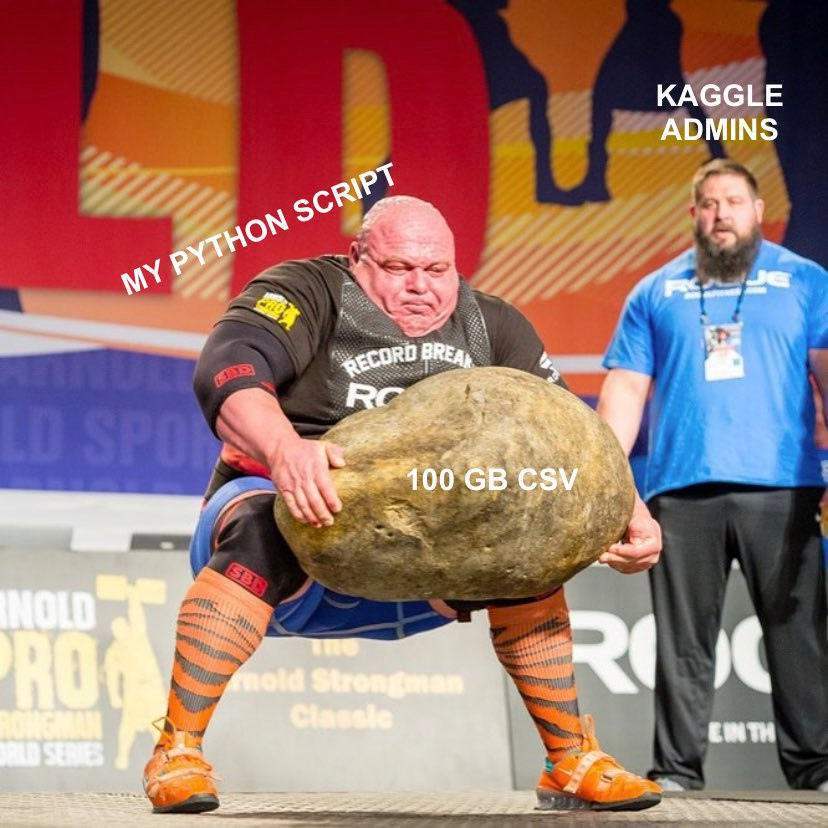